In [5]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [2]:
class AgentState(TypedDict):
    number1: int
    operation : str
    number2: int
    finalNumber: int

In [9]:
def adder (state: AgentState) -> AgentState:
    """Adds two numbers in the state."""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor (state: AgentState) -> AgentState:
    """Subtracts two numbers in the state."""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def deceide_next_node(state: AgentState) -> str:
    """Decides the next node based on the operation."""
    if state['operation'] == 'add':
        return 'adder_node'
    elif state['operation'] == 'subtract':
        return 'subtractor_node'
    else:
        raise ValueError("Unknown operation")

In [13]:
graph = StateGraph(AgentState)
graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    deceide_next_node,
    {
        "adder_node": "adder_node",
        "subtractor_node": "subtractor_node"
    }
)

graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app= graph.compile()


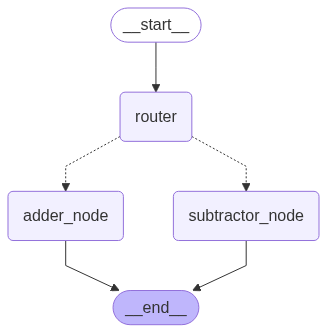

In [14]:
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
initial_state = AgentState(
    number1=10,
    operation='add',
    number2=5,)
result = app.invoke(initial_state)

In [18]:
result

{'number1': 10, 'operation': 'add', 'number2': 5, 'finalNumber': 15}